<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/mc_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

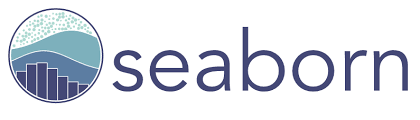


# **Análisis Exploratorio de los Datos - Matriz de Correlación**

# **Carga de módulos**

### **Para analisis de datos**

In [2]:
import pandas as pd
import numpy as np

### **Para graficos**

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

## **Carga de Datos**

***Antes que nada, se genera el dataframe con los datos que se utilizaran para la matriz de correlación...***


In [4]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/recursos_humanos_II.csv"

In [5]:
analisis = pd.read_csv(url)
analisis.drop(columns="Unnamed: 0", inplace=True)
analisis.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


***Se cambian los nombres de las columnas para mejor interpretacion...***

In [6]:
analisis.rename(columns={"satisfaction_level":"niveldesatisfaccion",
                         "last_evaluation":"ultimaevaluacion",
                         "number_project":"numerosdeproyectos",
                         "average_montly_hours":"horasmensualespromedio",
                         "time_spend_company":"tiempoenlaempresa",
                         "Work_accident":"accidentedetrabajo",
                         "left":"abandono",
                         "promotion_last_5years":"promocionultimos5años",
                         "sales":"ventas",
                         "salary":"sueldo"}, inplace= True)

# **Matriz de correlación**

In [7]:
pearson = analisis.corr(method="pearson")

In [8]:
pearson

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años
niveldesatisfaccion,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
ultimaevaluacion,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
numerosdeproyectos,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
horasmensualespromedio,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
tiempoenlaempresa,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
accidentedetrabajo,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
abandono,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promocionultimos5años,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


### **Mapa de Calor** - Heatmap

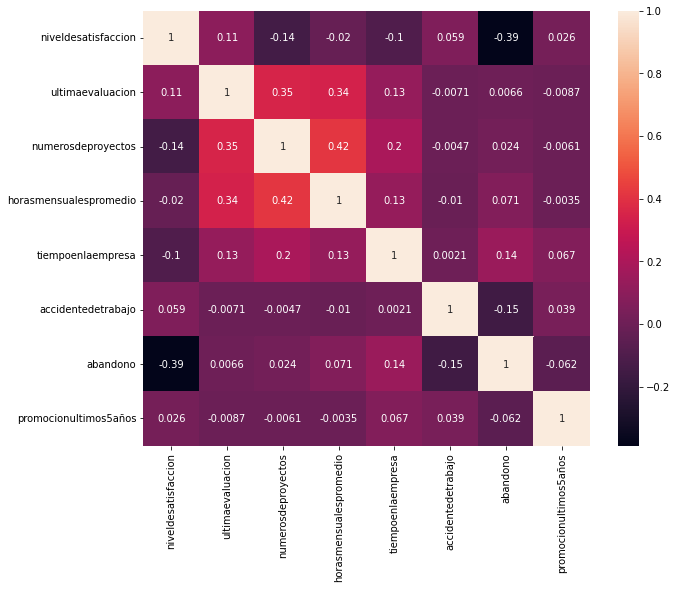

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(pearson, 
            annot=True)

plt.show()

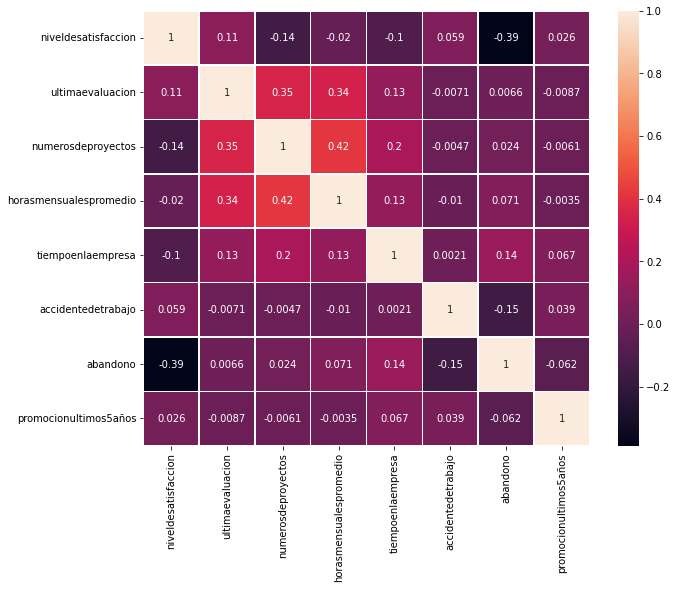

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(pearson, 
            annot=True,
            linewidths=.5)
plt.show()

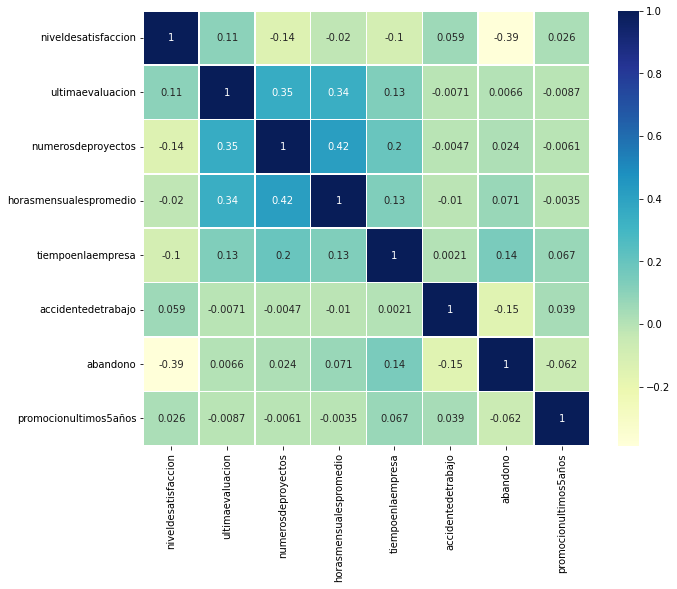

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(pearson, 
            annot=True,
            linewidths=.5,
            cmap="YlGnBu")
plt.show()

In [12]:
analisis2 = analisis.copy(deep=False)
analisis2.drop(["niveldesatisfaccion","tiempoenlaempresa","accidentedetrabajo",
                "promocionultimos5años","ventas","sueldo","abandono"], 
               axis=1, 
               inplace=True)

In [13]:
analisiscorrelacion2 = round(analisis2.corr(),3)
analisiscorrelacion2

,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio
ultimaevaluacion,1.000,0.349,0.340
numerosdeproyectos,0.349,1.000,0.417
horasmensualespromedio,0.340,0.417,1.000


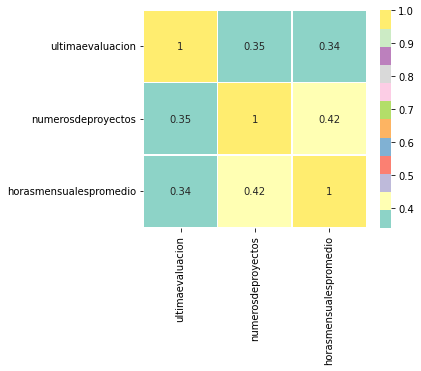

In [14]:
plt.figure(figsize=(5,4))
sns.heatmap(analisiscorrelacion2, 
            annot=True,
            linewidths=.5,
            cmap="Set3")
plt.show()